# Basic Pytorch

In [267]:
import numpy as np
import torch
import torch.nn as nn

##  Linear Regression

In [268]:
linear = nn.Linear(1, 1)
print(linear.bias)
print(linear.weight)

Parameter containing:
tensor([0.3929], requires_grad=True)
Parameter containing:
tensor([[0.2864]], requires_grad=True)


In [269]:
loss_fn = torch.nn.MSELoss()
loss = loss_fn(linear.weight,linear.bias)
loss

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.0113, grad_fn=<MseLossBackward0>)

In [270]:
optimum = torch.optim.SGD(linear.parameters(),lr=0.01)
optimum

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [271]:
data = np.genfromtxt('data.csv', delimiter=',')
x_data = torch.from_numpy(data[:,0:1]).float()
y_data = torch.from_numpy(data[:,1:]).float()
n = len(y_data)

epochs = 1000
losses = []
for i in range(epochs):
        
        y_hat = linear(x_data)
        loss = loss_fn(y_hat, y_data)  
        losses.append(loss.item())
        
        optimum.zero_grad()
        loss.backward() 
        optimum.step()
    

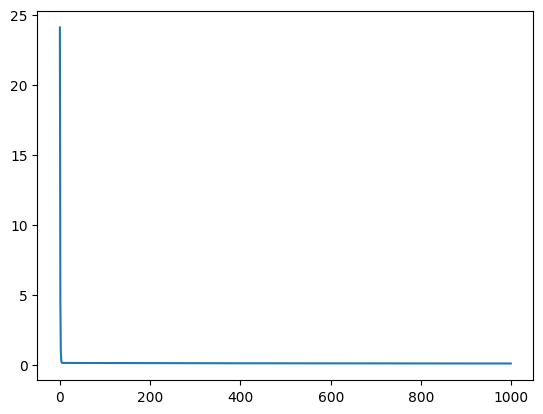

In [272]:
import matplotlib.pyplot as plt
plt.plot(losses)

## Logistic Regression

In [273]:
data = np.genfromtxt('iris_Petal_Logistic.csv', delimiter=',', skip_header=1)
x_data = torch.from_numpy(data[:,0:2])[:4]
y_data = torch.from_numpy(data[:,2])[:4]

print('X\n', x_data)
print('y\n', y_data)

X
 tensor([[1.4000, 0.2000],
        [1.4000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.2000]], dtype=torch.float64)
y
 tensor([0., 0., 0., 0.], dtype=torch.float64)


In [274]:
linear = nn.Linear(2,1)
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[ 0.3193, -0.1430]], requires_grad=True)
Parameter containing:
tensor([0.5361], requires_grad=True)


In [275]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01) 
epochs = 5

In [276]:
#one sample
for i in range(epochs):
    for j in range(4):
        xi = x_data[j].float()
        yi = y_data[j:j+1].float()
        
        y_hat = torch.sigmoid(linear(xi))
        print(f'y_hat: {y_hat.item()}')
        loss = loss_fn(y_hat,yi)
        print(f'loss: {loss.item()}')
        optimizer.zero_grad()
        loss.backward()
        print(f'(db, dw): ({linear.bias.grad.data}, {linear.weight.grad.data})')
        optimizer.step()
        print(f'(b, w): ({linear.bias.data}, {linear.weight.data} \n\n')

y_hat: 0.7220118045806885
loss: 1.1179475784301758
(db, dw): (tensor([0.1351]), tensor([[0.1891, 0.0270]]))
(b, w): (tensor([0.5348]), tensor([[ 0.3174, -0.1433]]) 


y_hat: 0.7211976647377014
loss: 1.1173996925354004
(db, dw): (tensor([0.1353]), tensor([[0.1894, 0.0271]]))
(b, w): (tensor([0.5334]), tensor([[ 0.3155, -0.1435]]) 


y_hat: 0.7139822840690613
loss: 1.1125504970550537
(db, dw): (tensor([0.1371]), tensor([[0.1782, 0.0274]]))
(b, w): (tensor([0.5320]), tensor([[ 0.3137, -0.1438]]) 


y_hat: 0.7258761525154114
loss: 1.1205501556396484
(db, dw): (tensor([0.1341]), tensor([[0.2011, 0.0268]]))
(b, w): (tensor([0.5307]), tensor([[ 0.3117, -0.1441]]) 


y_hat: 0.7187399864196777
loss: 1.1157467365264893
(db, dw): (tensor([0.1359]), tensor([[0.1903, 0.0272]]))
(b, w): (tensor([0.5293]), tensor([[ 0.3098, -0.1443]]) 


y_hat: 0.7179149985313416
loss: 1.115192174911499
(db, dw): (tensor([0.1361]), tensor([[0.1906, 0.0272]]))
(b, w): (tensor([0.5280]), tensor([[ 0.3079, -0.1446]]) 



In [277]:
data = np.genfromtxt('iris_Petal_Logistic.csv', delimiter=',', skip_header=1)
X = torch.from_numpy(data[:,0:2]).float()
Y = torch.from_numpy(data[:,2]).float().reshape(-1, 1)

print('X\n', X)
print('y\n', Y)

X
 tensor([[1.4000, 0.2000],
        [1.4000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.2000],
        [1.4000, 0.2000],
        [1.7000, 0.4000],
        [1.4000, 0.3000],
        [1.5000, 0.2000],
        [1.4000, 0.2000],
        [1.5000, 0.1000],
        [1.5000, 0.2000],
        [1.6000, 0.2000],
        [1.4000, 0.1000],
        [1.1000, 0.1000],
        [1.2000, 0.2000],
        [1.5000, 0.4000],
        [1.3000, 0.4000],
        [1.4000, 0.3000],
        [1.7000, 0.3000],
        [1.5000, 0.3000],
        [1.7000, 0.2000],
        [1.5000, 0.4000],
        [1.0000, 0.2000],
        [1.7000, 0.5000],
        [1.9000, 0.2000],
        [1.6000, 0.2000],
        [1.6000, 0.4000],
        [1.5000, 0.2000],
        [1.4000, 0.2000],
        [1.6000, 0.2000],
        [1.6000, 0.2000],
        [1.5000, 0.4000],
        [1.5000, 0.1000],
        [1.4000, 0.2000],
        [1.5000, 0.1000],
        [1.2000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.1000],
        [

In [278]:
linear = nn.Linear(2,1)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01)
epochs = 10000

In [279]:
# train with all sample in data
losses = []
for i in range(epochs):
    y_hat = torch.sigmoid(linear(X))
    
    loss = loss_fn(y_hat,Y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

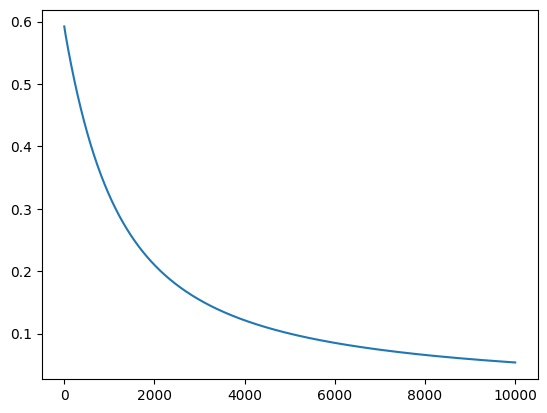

In [280]:
plt.plot(losses)

In [281]:
# compute accuracy 
z = linear(X)
y_hat = nn.Sigmoid()(z)

# compute accuracy using y and y_hat
y_hat_rounded = y_hat.round()
acc = (y_hat_rounded == Y).float().mean()
print(acc)

tensor(1.)


In [294]:
data = np.genfromtxt('iris_full.csv',delimiter=',',skip_header=1)
X = torch.from_numpy(data[:,0:4]).float()
y = torch.from_numpy(data[:,4:]).float()

print('X\n', X)
print('y\n', y)


X
 tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000

In [295]:
linear = nn.Linear(4,1)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01)
epochs = 10000

In [296]:
for i in range(epochs):
    y_hat = torch.sigmoid(linear(X))
    
    loss = loss_fn(y_hat,y)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = BCE(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update(theta, gradient, lr)

        train_batch_losses.append(train_loss)


        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = BCE(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')

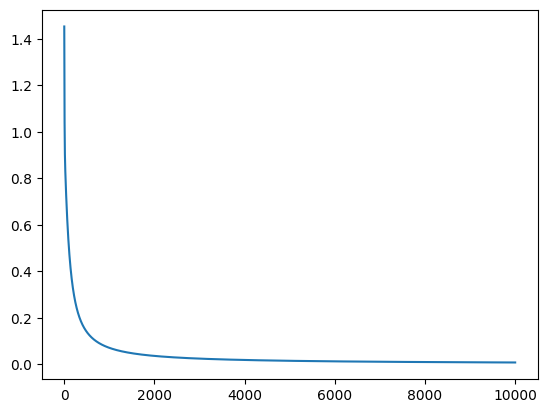

In [297]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [298]:
# compute accuracy 
z = linear(X)
y_hat = nn.Sigmoid()(z)

# compute accuracy using y and y_hat
y_hat_rounded = y_hat.round()
acc = (y_hat_rounded == y).float().mean()
print(acc)

tensor(1.)


## Softmax Regression